In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set()

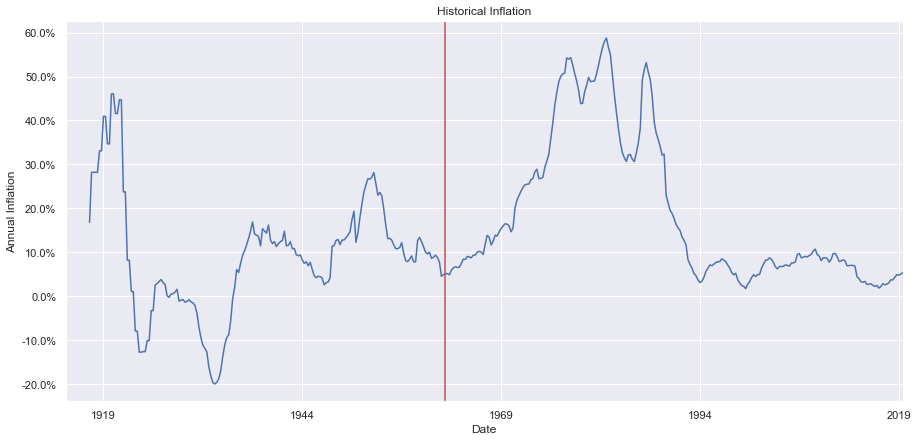

In [6]:
plt.rcParams["figure.figsize"] = (15,7)

inflation = pd.read_csv('now/cpi-stats-nz-1914-now.csv', index_col=0, header=1, skipfooter=33, engine='python', parse_dates=True, na_values='0.000000')
#inflation = inflation.resample('MS').interpolate(method='linear').fillna(method='ffill')
inflation = inflation.fillna(method='ffill')
inflation.columns = ['Products Inflation']

inflation = inflation / inflation.iloc[-1]
inflation['Prev Year'] = inflation['Products Inflation'].shift(12)
inflation['Products Inflation Level'] = (inflation['Products Inflation'] - inflation['Prev Year']).divide(inflation['Prev Year'])

ax = inflation['Products Inflation Level'].plot()
plt.axvline(x='1962-01-01', color='r', linestyle='-')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: str(round(x * 100)) + '%'))
plt.title('Historical Inflation')
plt.ylabel('Annual Inflation')
plt.xlabel('Date')
plt.show()

Source: CPI Stats NZ

Historically, there were periods in the NZ history when the inflation was wild. But in the considered period after 1992 the inflation was quite stable and never really higher than 5%.